In [1]:
# General imports
import numpy as np
import pandas as pd
import itertools

# Sklearn imports
from sklearn.preprocessing import LabelEncoder


In [2]:
# defining global variables 

dataset_path = 'Datasets/Synthetic/'

nb_samples = 100000


## 1- Synthetic data: S1 (X and A are independent)

In [3]:
x0, x1 = 0.5, 0.5
a0, a1 = 0.3, 0.7 


p_a0_x0 = np.rint(a0 * x0 * nb_samples).astype(int)
p_a0_x1 = np.rint(a0 * x1 * nb_samples).astype(int)
p_a1_x0 = np.rint(a1 * x0 * nb_samples).astype(int)
p_a1_x1 = np.rint(a1 * x1 * nb_samples).astype(int)


print(p_a0_x0, p_a0_x1, p_a1_x0, p_a1_x1)
orig_nb_samples = [p_a0_x0, p_a0_x1, p_a1_x0, p_a1_x1]
print (sum(orig_nb_samples))


15000 15000 35000 35000
100000


In [4]:
p_a1_x0

35000

In [5]:
# creating a list of column names
column_values = ['A','X']

# creating the patterns of features
pattern_features = [x for x in itertools.product([0, 1], repeat=len(column_values))]

# creating the dataframe
df_s1 = pd.DataFrame(data = pattern_features, 
                  columns = column_values)
  
# displaying the dataframe
display(df_s1)

,A,X
0,0,0
1,0,1
2,1,0
3,1,1


In [6]:
df_s1['n'] = orig_nb_samples
df_s1 = df_s1.loc[df_s1.index.repeat(df_s1.n)].reset_index(drop=True)
del df_s1['n']
display(df_s1)

,A,X
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
99995,1,1
99996,1,1
99997,1,1
99998,1,1


In [7]:
df_s1['Y'] = df_s1.apply(lambda row: int(row.A == 1 or row.X == 1), axis = 1)

In [8]:
df_s1

,A,X,Y
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
99995,1,1,1
99996,1,1,1
99997,1,1,1
99998,1,1,1


In [10]:
print(df_s1.X.value_counts())
A0_X0_Y0 = len(df_s1[(df_s1['A'] == 0) & (df_s1['X'] == 0) & (df_s1['Y'] == 0)])
A0_X1_Y0 = len(df_s1[(df_s1['A'] == 0) & (df_s1['X'] == 1) & (df_s1['Y'] == 0)])
A1_X0_Y0 = len(df_s1[(df_s1['A'] == 1) & (df_s1['X'] == 0) & (df_s1['Y'] == 0)])
A1_X1_Y0 = len(df_s1[(df_s1['A'] == 1) & (df_s1['X'] == 1) & (df_s1['Y'] == 0)])
A0_X0_Y1 = len(df_s1[(df_s1['A'] == 0) & (df_s1['X'] == 0) & (df_s1['Y'] == 1)])
A0_X1_Y1 = len(df_s1[(df_s1['A'] == 0) & (df_s1['X'] == 1) & (df_s1['Y'] == 1)])
A1_X0_Y1 = len(df_s1[(df_s1['A'] == 1) & (df_s1['X'] == 0) & (df_s1['Y'] == 1)])
A1_X1_Y1 = len(df_s1[(df_s1['A'] == 1) & (df_s1['X'] == 1) & (df_s1['Y'] == 1)])

print(f'A0_X0_Y0: {A0_X0_Y0}\n A0_X1_Y0: {A0_X1_Y0}\n A1_X0_Y0: {A1_X0_Y0}\n A1_X1_Y0: {A1_X1_Y0}\n A0_X0_Y1: {A0_X0_Y1}\n A0_X1_Y1: {A0_X1_Y1}\n A1_X0_Y1: {A1_X0_Y1}\n A1_X1_Y1: {A1_X1_Y1}\n')


df_s1

0    50000
1    50000
Name: X, dtype: int64
A0_X0_Y0: 15000
 A0_X1_Y0: 0
 A1_X0_Y0: 0
 A1_X1_Y0: 0
 A0_X0_Y1: 0
 A0_X1_Y1: 15000
 A1_X0_Y1: 35000
 A1_X1_Y1: 35000



,A,X,Y
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
99995,1,1,1
99996,1,1,1
99997,1,1,1
99998,1,1,1


In [10]:
# saving the dataset as a csv file
df_s1.to_csv(dataset_path + 'S1' + '.csv', index=False)

## 2- Synthetic data: S2 (X and A are dependent)

In [16]:
def generate_synthetic_data(p,n):
    X = np.random.binomial(1,p,n)
    A = [np.random.binomial(1,0.55,1)[0] if x ==0 else np.random.binomial(1,0.75,1)[0] for x in X]
    Y = [0.5*x + 0.75*a + np.random.normal(size=1) [0] for x,a in zip(X,A)]
    df = pd.DataFrame({'X': X, 'A': A, 'Y': Y})
    return df

In [17]:
df_s2 = generate_synthetic_data(0.5,100000)

In [18]:
df_s2['Y'] = df_s2.apply(lambda row: int(row.A == 1 or row.X == 1), axis = 1)

In [19]:
print(df_s1.X.value_counts())
A0_X0_Y0 = len(df_s2[(df_s2['A'] == 0) & (df_s2['X'] == 0) & (df_s2['Y'] == 0)])
A0_X1_Y0 = len(df_s2[(df_s2['A'] == 0) & (df_s2['X'] == 1) & (df_s2['Y'] == 0)])
A1_X0_Y0 = len(df_s2[(df_s2['A'] == 1) & (df_s2['X'] == 0) & (df_s2['Y'] == 0)])
A1_X1_Y0 = len(df_s2[(df_s2['A'] == 1) & (df_s2['X'] == 1) & (df_s2['Y'] == 0)])
A0_X0_Y1 = len(df_s2[(df_s2['A'] == 0) & (df_s2['X'] == 0) & (df_s2['Y'] == 1)])
A0_X1_Y1 = len(df_s2[(df_s2['A'] == 0) & (df_s2['X'] == 1) & (df_s2['Y'] == 1)])
A1_X0_Y1 = len(df_s2[(df_s2['A'] == 1) & (df_s2['X'] == 0) & (df_s2['Y'] == 1)])
A1_X1_Y1 = len(df_s2[(df_s2['A'] == 1) & (df_s2['X'] == 1) & (df_s2['Y'] == 1)])

print(f'A0_X0_Y0: {A0_X0_Y0}\n A0_X1_Y0: {A0_X1_Y0}\n A1_X0_Y0: {A1_X0_Y0}\n A1_X1_Y0: {A1_X1_Y0}\n A0_X0_Y1: {A0_X0_Y1}\n A0_X1_Y1: {A0_X1_Y1}\n A1_X0_Y1: {A1_X0_Y1}\n A1_X1_Y1: {A1_X1_Y1}\n')


0    50000
1    50000
Name: X, dtype: int64
A0_X0_Y0: 22496
 A0_X1_Y0: 0
 A1_X0_Y0: 0
 A1_X1_Y0: 0
 A0_X0_Y1: 0
 A0_X1_Y1: 12657
 A1_X0_Y1: 27353
 A1_X1_Y1: 37494



In [17]:
# saving the dataset as a csv file
df_s2.to_csv(dataset_path + 'S2' + '.csv', index=False)

## 3- Synthetic data: S3 (X and A are dependent + SD and SD' have opppsite signs + |SD'| < |SD|)

In [3]:
a0_x0_y0, a0_x0_y1, a0_x1_y0, a0_x1_y1, a0_x2_y0, a0_x2_y1 = 3/30, 0/30, 6/30, 5/30,0/30,1/30
a1_x0_y0, a1_x0_y1, a1_x1_y0, a1_x1_y1, a1_x2_y0, a1_x2_y1 = 7/30, 1/30, 1/30, 5/30,0/30,1/30


p_a0_x0_y0 = np.rint(a0_x0_y0 * nb_samples).astype(int)
p_a0_x0_y1 = np.rint(a0_x0_y1 * nb_samples).astype(int)
p_a0_x1_y0 = np.rint(a0_x1_y0 * nb_samples).astype(int)
p_a0_x1_y1 = np.rint(a0_x1_y1 * nb_samples).astype(int)
p_a0_x2_y0 = np.rint(a0_x2_y0 * nb_samples).astype(int)
p_a0_x2_y1 = np.rint(a0_x2_y1 * nb_samples).astype(int)

p_a1_x0_y0 = np.rint(a1_x0_y0 * nb_samples).astype(int)
p_a1_x0_y1 = np.rint(a1_x0_y1 * nb_samples).astype(int)
p_a1_x1_y0 = np.rint(a1_x1_y0 * nb_samples).astype(int)
p_a1_x1_y1 = np.rint(a1_x1_y1 * nb_samples).astype(int)
p_a1_x2_y0 = np.rint(a1_x2_y0 * nb_samples).astype(int)
p_a1_x2_y1 = np.rint(a1_x2_y1 * nb_samples).astype(int)


print(p_a0_x0_y0, p_a0_x0_y1, p_a0_x1_y0, p_a0_x1_y1, p_a0_x2_y0, p_a0_x2_y1, p_a1_x0_y0, p_a1_x0_y1, p_a1_x1_y0, p_a1_x1_y1, p_a1_x2_y0, p_a1_x2_y1)
orig_nb_samples = [p_a0_x0_y0, p_a0_x0_y1, p_a0_x1_y0, p_a0_x1_y1, p_a0_x2_y0, p_a0_x2_y1, p_a1_x0_y0, p_a1_x0_y1, p_a1_x1_y0, p_a1_x1_y1, p_a1_x2_y0, p_a1_x2_y1]

10000 0 20000 16667 0 3333 23333 3333 3333 16667 0 3333


In [4]:
sum(orig_nb_samples)

99999

In [5]:
# creating a list of column names
column_values = ['A', 'X', 'Y']

lists = [[0,1],[0,1,2], [0,1]]
# creating the patterns of features
#pattern_features = [x for x in itertools.product([0, 1], repeat=len(column_values))]

pattern_features = [x for x in itertools.product(*lists)]

# # creating the dataframe
df_s3 = pd.DataFrame(data = pattern_features, 
                   columns = column_values)
  
# # displaying the dataframe
display(df_s3)

,A,X,Y
0,0,0,0
1,0,0,1
2,0,1,0
3,0,1,1
4,0,2,0
5,0,2,1
6,1,0,0
7,1,0,1
8,1,1,0
9,1,1,1


In [6]:
df_s3['n'] = orig_nb_samples
df_s3 = df_s3.loc[df_s3.index.repeat(df_s3.n)].reset_index(drop=True)
del df_s3['n']

In [8]:
print(df_s3.X.value_counts())
A0_X0_Y0 = len(df_s3[(df_s3['A'] == 0) & (df_s3['X'] == 0) & (df_s3['Y'] == 0)])
A0_X1_Y0 = len(df_s3[(df_s3['A'] == 0) & (df_s3['X'] == 1) & (df_s3['Y'] == 0)])
A1_X0_Y0 = len(df_s3[(df_s3['A'] == 1) & (df_s3['X'] == 0) & (df_s3['Y'] == 0)])
A1_X1_Y0 = len(df_s3[(df_s3['A'] == 1) & (df_s3['X'] == 1) & (df_s3['Y'] == 0)])
A0_X0_Y1 = len(df_s3[(df_s3['A'] == 0) & (df_s3['X'] == 0) & (df_s3['Y'] == 1)])
A0_X1_Y1 = len(df_s3[(df_s3['A'] == 0) & (df_s3['X'] == 1) & (df_s3['Y'] == 1)])
A1_X0_Y1 = len(df_s3[(df_s3['A'] == 1) & (df_s3['X'] == 0) & (df_s3['Y'] == 1)])
A1_X1_Y1 = len(df_s3[(df_s3['A'] == 1) & (df_s3['X'] == 1) & (df_s3['Y'] == 1)])

print(f'A0_X0_Y0: {A0_X0_Y0}\n A0_X1_Y0: {A0_X1_Y0}\n A1_X0_Y0: {A1_X0_Y0}\n A1_X1_Y0: {A1_X1_Y0}\n A0_X0_Y1: {A0_X0_Y1}\n A0_X1_Y1: {A0_X1_Y1}\n A1_X0_Y1: {A1_X0_Y1}\n A1_X1_Y1: {A1_X1_Y1}\n')


1    56667
0    36666
2     6666
Name: X, dtype: int64
A0_X0_Y0: 10000
 A0_X1_Y0: 20000
 A1_X0_Y0: 23333
 A1_X1_Y0: 3333
 A0_X0_Y1: 0
 A0_X1_Y1: 16667
 A1_X0_Y1: 3333
 A1_X1_Y1: 16667



In [9]:
df_s3

,A,X,Y
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
99994,1,2,1
99995,1,2,1
99996,1,2,1
99997,1,2,1


In [10]:
# saving the dataset as a csv file
df_s3.to_csv(dataset_path + 'S3' + '.csv', index=False)

## 4- Synthetic data: S4 (X and A are dependent + The Simpson Paradox)

In [11]:
a0_x0_y0, a0_x0_y1, a0_x1_y0, a0_x1_y1 = 4/30, 1/30, 0/30, 10/30
a1_x0_y0, a1_x0_y1, a1_x1_y0, a1_x1_y1 = 1/30, 0/30, 2/30, 12/30


p_a0_x0_y0 = np.rint(a0_x0_y0 * nb_samples).astype(int)
p_a0_x0_y1 = np.rint(a0_x0_y1 * nb_samples).astype(int)
p_a0_x1_y0 = np.rint(a0_x1_y0 * nb_samples).astype(int)
p_a0_x1_y1 = np.rint(a0_x1_y1 * nb_samples).astype(int)
p_a1_x0_y0 = np.rint(a1_x0_y0 * nb_samples).astype(int)
p_a1_x0_y1 = np.rint(a1_x0_y1 * nb_samples).astype(int)
p_a1_x1_y0 = np.rint(a1_x1_y0 * nb_samples).astype(int)
p_a1_x1_y1 = np.rint(a1_x1_y1 * nb_samples).astype(int)


print(p_a0_x0_y0, p_a0_x0_y1, p_a0_x1_y0, p_a0_x1_y1, p_a1_x0_y0, p_a1_x0_y1, p_a1_x1_y0, p_a1_x1_y1)
orig_nb_samples = [p_a0_x0_y0, p_a0_x0_y1, p_a0_x1_y0, p_a0_x1_y1, p_a1_x0_y0, p_a1_x0_y1, p_a1_x1_y0, p_a1_x1_y1]

13333 3333 0 33333 3333 0 6667 40000


In [12]:
# creating a list of column names
column_values = ['A', 'X', 'Y']

# creating the patterns of features
pattern_features = [x for x in itertools.product([0, 1], repeat=len(column_values))]

# creating the dataframe
df_s4 = pd.DataFrame(data = pattern_features, 
                  columns = column_values)
  
# displaying the dataframe
display(df_s4)

,A,X,Y
0,0,0,0
1,0,0,1
2,0,1,0
3,0,1,1
4,1,0,0
5,1,0,1
6,1,1,0
7,1,1,1


In [13]:
df_s4['n'] = orig_nb_samples
df_s4 = df_s4.loc[df_s4.index.repeat(df_s4.n)].reset_index(drop=True)
del df_s4['n']

In [14]:
print(df_s4.X.value_counts())
A0_X0_Y0 = len(df_s4[(df_s4['A'] == 0) & (df_s4['X'] == 0) & (df_s4['Y'] == 0)])
A0_X1_Y0 = len(df_s4[(df_s4['A'] == 0) & (df_s4['X'] == 1) & (df_s4['Y'] == 0)])
A1_X0_Y0 = len(df_s4[(df_s4['A'] == 1) & (df_s4['X'] == 0) & (df_s4['Y'] == 0)])
A1_X1_Y0 = len(df_s4[(df_s4['A'] == 1) & (df_s4['X'] == 1) & (df_s4['Y'] == 0)])
A0_X0_Y1 = len(df_s4[(df_s4['A'] == 0) & (df_s4['X'] == 0) & (df_s4['Y'] == 1)])
A0_X1_Y1 = len(df_s4[(df_s4['A'] == 0) & (df_s4['X'] == 1) & (df_s4['Y'] == 1)])
A1_X0_Y1 = len(df_s4[(df_s4['A'] == 1) & (df_s4['X'] == 0) & (df_s4['Y'] == 1)])
A1_X1_Y1 = len(df_s4[(df_s4['A'] == 1) & (df_s4['X'] == 1) & (df_s4['Y'] == 1)])

print(f'A0_X0_Y0: {A0_X0_Y0}\n A0_X1_Y0: {A0_X1_Y0}\n A1_X0_Y0: {A1_X0_Y0}\n A1_X1_Y0: {A1_X1_Y0}\n A0_X0_Y1: {A0_X0_Y1}\n A0_X1_Y1: {A0_X1_Y1}\n A1_X0_Y1: {A1_X0_Y1}\n A1_X1_Y1: {A1_X1_Y1}\n')


1    80000
0    19999
Name: X, dtype: int64
A0_X0_Y0: 13333
 A0_X1_Y0: 0
 A1_X0_Y0: 3333
 A1_X1_Y0: 6667
 A0_X0_Y1: 3333
 A0_X1_Y1: 33333
 A1_X0_Y1: 0
 A1_X1_Y1: 40000



In [15]:
# saving the dataset as a csv file
df_s4.to_csv(dataset_path + 'S4' + '.csv', index=False)

## 5- Synthetic data: S5 (X and A are dependent + SD and SD' have opppsite signs + |SD'| > |SD|)

In [30]:
a0_x0_y0, a0_x0_y1, a0_x1_y0, a0_x1_y1, a0_x2_y0, a0_x2_y1 = 1/30, 0/30, 8/30, 5/30,0/30,1/30
a1_x0_y0, a1_x0_y1, a1_x1_y0, a1_x1_y1, a1_x2_y0, a1_x2_y1 = 7/30, 1/30, 1/30, 5/30,0/30,1/30


p_a0_x0_y0 = np.rint(a0_x0_y0 * nb_samples).astype(int)
p_a0_x0_y1 = np.rint(a0_x0_y1 * nb_samples).astype(int)
p_a0_x1_y0 = np.rint(a0_x1_y0 * nb_samples).astype(int)
p_a0_x1_y1 = np.rint(a0_x1_y1 * nb_samples).astype(int)
p_a0_x2_y0 = np.rint(a0_x2_y0 * nb_samples).astype(int)
p_a0_x2_y1 = np.rint(a0_x2_y1 * nb_samples).astype(int)

p_a1_x0_y0 = np.rint(a1_x0_y0 * nb_samples).astype(int)
p_a1_x0_y1 = np.rint(a1_x0_y1 * nb_samples).astype(int)
p_a1_x1_y0 = np.rint(a1_x1_y0 * nb_samples).astype(int)
p_a1_x1_y1 = np.rint(a1_x1_y1 * nb_samples).astype(int)
p_a1_x2_y0 = np.rint(a1_x2_y0 * nb_samples).astype(int)
p_a1_x2_y1 = np.rint(a1_x2_y1 * nb_samples).astype(int)


print(p_a0_x0_y0, p_a0_x0_y1, p_a0_x1_y0, p_a0_x1_y1, p_a0_x2_y0, p_a0_x2_y1, p_a1_x0_y0, p_a1_x0_y1, p_a1_x1_y0, p_a1_x1_y1, p_a1_x2_y0, p_a1_x2_y1)
orig_nb_samples = [p_a0_x0_y0, p_a0_x0_y1, p_a0_x1_y0, p_a0_x1_y1, p_a0_x2_y0, p_a0_x2_y1, p_a1_x0_y0, p_a1_x0_y1, p_a1_x1_y0, p_a1_x1_y1, p_a1_x2_y0, p_a1_x2_y1]

3333 0 26667 16667 0 3333 23333 3333 3333 16667 0 3333


In [31]:
# creating a list of column names
column_values = ['A', 'X', 'Y']

lists = [[0,1],[0,1,2], [0,1]]
# creating the patterns of features
#pattern_features = [x for x in itertools.product([0, 1], repeat=len(column_values))]

pattern_features = [x for x in itertools.product(*lists)]

# # creating the dataframe
df_s5 = pd.DataFrame(data = pattern_features, 
                   columns = column_values)
  
# # displaying the dataframe
display(df_s5)

,A,X,Y
0,0,0,0
1,0,0,1
2,0,1,0
3,0,1,1
4,0,2,0
5,0,2,1
6,1,0,0
7,1,0,1
8,1,1,0
9,1,1,1


In [32]:
df_s5['n'] = orig_nb_samples
df_s5 = df_s5.loc[df_s5.index.repeat(df_s5.n)].reset_index(drop=True)
del df_s5['n']

In [33]:
print(df_s5.X.value_counts())
A0_X0_Y0 = len(df_s5[(df_s5['A'] == 0) & (df_s5['X'] == 0) & (df_s5['Y'] == 0)])
A0_X1_Y0 = len(df_s5[(df_s5['A'] == 0) & (df_s5['X'] == 1) & (df_s5['Y'] == 0)])
A1_X0_Y0 = len(df_s5[(df_s5['A'] == 1) & (df_s5['X'] == 0) & (df_s5['Y'] == 0)])
A1_X1_Y0 = len(df_s5[(df_s5['A'] == 1) & (df_s5['X'] == 1) & (df_s5['Y'] == 0)])
A0_X0_Y1 = len(df_s5[(df_s5['A'] == 0) & (df_s5['X'] == 0) & (df_s5['Y'] == 1)])
A0_X1_Y1 = len(df_s5[(df_s5['A'] == 0) & (df_s5['X'] == 1) & (df_s5['Y'] == 1)])
A1_X0_Y1 = len(df_s5[(df_s5['A'] == 1) & (df_s5['X'] == 0) & (df_s5['Y'] == 1)])
A1_X1_Y1 = len(df_s5[(df_s5['A'] == 1) & (df_s5['X'] == 1) & (df_s5['Y'] == 1)])

print(f'A0_X0_Y0: {A0_X0_Y0}\n A0_X1_Y0: {A0_X1_Y0}\n A1_X0_Y0: {A1_X0_Y0}\n A1_X1_Y0: {A1_X1_Y0}\n A0_X0_Y1: {A0_X0_Y1}\n A0_X1_Y1: {A0_X1_Y1}\n A1_X0_Y1: {A1_X0_Y1}\n A1_X1_Y1: {A1_X1_Y1}\n')


1    63334
0    29999
2     6666
Name: X, dtype: int64
A0_X0_Y0: 3333
 A0_X1_Y0: 26667
 A1_X0_Y0: 23333
 A1_X1_Y0: 3333
 A0_X0_Y1: 0
 A0_X1_Y1: 16667
 A1_X0_Y1: 3333
 A1_X1_Y1: 16667



In [35]:
# saving the dataset as a csv file
df_s5.to_csv(dataset_path + 'S5' + '.csv', index=False)

## 6- Synthetic data: S6 (X and A are dependent + X has 5 different values)

In [34]:
def generate_synthetic_data(n):
    X = np.random.randint(0,5,n)
    A = [np.random.binomial(1,0.55,1)[0] if x < 3 else np.random.binomial(1,0.75,1)[0] for x in X]
    Y = [0.5*x + 0.75*a + np.random.normal(size=1) [0] for x,a in zip(X,A)]
    df = pd.DataFrame({'X': X, 'A': A, 'Y':Y})
    return df

In [35]:
df_s6 = generate_synthetic_data(100000)

In [36]:
th=df_s6.Y.quantile(.25)

In [37]:
df_s6['Y'] = df_s6['Y'].apply(lambda x: 1 if x > th else 0)

In [38]:
print(df_s6.X.value_counts())
A0_X0_Y0 = len(df_s6[(df_s6['A'] == 0) & (df_s6['X'] == 0) & (df_s6['Y'] == 0)])
A0_X1_Y0 = len(df_s6[(df_s6['A'] == 0) & (df_s6['X'] == 1) & (df_s6['Y'] == 0)])
A1_X0_Y0 = len(df_s6[(df_s6['A'] == 1) & (df_s6['X'] == 0) & (df_s6['Y'] == 0)])
A1_X1_Y0 = len(df_s6[(df_s6['A'] == 1) & (df_s6['X'] == 1) & (df_s6['Y'] == 0)])
A0_X0_Y1 = len(df_s6[(df_s6['A'] == 0) & (df_s6['X'] == 0) & (df_s6['Y'] == 1)])
A0_X1_Y1 = len(df_s6[(df_s6['A'] == 0) & (df_s6['X'] == 1) & (df_s6['Y'] == 1)])
A1_X0_Y1 = len(df_s6[(df_s6['A'] == 1) & (df_s6['X'] == 0) & (df_s6['Y'] == 1)])
A1_X1_Y1 = len(df_s6[(df_s6['A'] == 1) & (df_s6['X'] == 1) & (df_s6['Y'] == 1)])

print(f'A0_X0_Y0: {A0_X0_Y0}\n A0_X1_Y0: {A0_X1_Y0}\n A1_X0_Y0: {A1_X0_Y0}\n A1_X1_Y0: {A1_X1_Y0}\n A0_X0_Y1: {A0_X0_Y1}\n A0_X1_Y1: {A0_X1_Y1}\n A1_X0_Y1: {A1_X0_Y1}\n A1_X1_Y1: {A1_X1_Y1}\n')


3    20207
1    20196
2    19968
4    19944
0    19685
Name: X, dtype: int64
A0_X0_Y0: 6502
 A0_X1_Y0: 4687
 A1_X0_Y0: 4688
 A1_X1_Y0: 2708
 A0_X0_Y1: 2522
 A0_X1_Y1: 4317
 A1_X0_Y1: 5973
 A1_X1_Y1: 8484



In [15]:
# saving the dataset as a csv file
df_s6.to_csv(dataset_path + 'S6' + '.csv', index=False)

## 7- Synthetic data: S7 (X and A are dependent + X has 5 different values+ S7 satisfies assumption IV-4)

In [58]:
a0_x0_y0, a0_x0_y1, a0_x1_y0, a0_x1_y1, a0_x2_y0, a0_x2_y1, a0_x3_y0, a0_x3_y1, a0_x4_y0, a0_x4_y1 = 0.09,0.05,0.04,0.07,0.06,0.04,0.02,0.06,0.12,0.05
a1_x0_y0, a1_x0_y1, a1_x1_y0, a1_x1_y1, a1_x2_y0, a1_x2_y1, a1_x3_y0, a1_x3_y1, a1_x4_y0, a1_x4_y1 = 0,0.05,0.06,0.07,0.05,0.04,0.02,0.06,0,0.05


p_a0_x0_y0 = np.rint(a0_x0_y0 * nb_samples).astype(int)
p_a0_x0_y1 = np.rint(a0_x0_y1 * nb_samples).astype(int)
p_a0_x1_y0 = np.rint(a0_x1_y0 * nb_samples).astype(int)
p_a0_x1_y1 = np.rint(a0_x1_y1 * nb_samples).astype(int)
p_a0_x2_y0 = np.rint(a0_x2_y0 * nb_samples).astype(int)
p_a0_x2_y1 = np.rint(a0_x2_y1 * nb_samples).astype(int)
p_a0_x3_y0 = np.rint(a0_x3_y0 * nb_samples).astype(int)
p_a0_x3_y1 = np.rint(a0_x3_y1 * nb_samples).astype(int)
p_a0_x4_y0 = np.rint(a0_x4_y0 * nb_samples).astype(int)
p_a0_x4_y1 = np.rint(a0_x4_y1 * nb_samples).astype(int)

p_a1_x0_y0 = np.rint(a1_x0_y0 * nb_samples).astype(int)
p_a1_x0_y1 = np.rint(a1_x0_y1 * nb_samples).astype(int)
p_a1_x1_y0 = np.rint(a1_x1_y0 * nb_samples).astype(int)
p_a1_x1_y1 = np.rint(a1_x1_y1 * nb_samples).astype(int)
p_a1_x2_y0 = np.rint(a1_x2_y0 * nb_samples).astype(int)
p_a1_x2_y1 = np.rint(a1_x2_y1 * nb_samples).astype(int)
p_a1_x3_y0 = np.rint(a1_x3_y0 * nb_samples).astype(int)
p_a1_x3_y1 = np.rint(a1_x3_y1 * nb_samples).astype(int)
p_a1_x4_y0 = np.rint(a1_x4_y0 * nb_samples).astype(int)
p_a1_x4_y1 = np.rint(a1_x4_y1 * nb_samples).astype(int)


print(p_a0_x0_y0, p_a0_x0_y1, p_a0_x1_y0, p_a0_x1_y1, p_a0_x2_y0, p_a0_x2_y1,p_a0_x3_y0, p_a0_x3_y1, p_a0_x4_y0, p_a0_x4_y1, p_a1_x0_y0, p_a1_x0_y1, p_a1_x1_y0, p_a1_x1_y1, p_a1_x2_y0, p_a1_x2_y1,p_a1_x3_y0, p_a1_x3_y1, p_a1_x4_y0, p_a1_x4_y1)
orig_nb_samples = [p_a0_x0_y0, p_a0_x0_y1, p_a0_x1_y0, p_a0_x1_y1, p_a0_x2_y0, p_a0_x2_y1, p_a0_x3_y0, p_a0_x3_y1, p_a0_x4_y0, p_a0_x4_y1,p_a1_x0_y0, p_a1_x0_y1, p_a1_x1_y0, p_a1_x1_y1, p_a1_x2_y0, p_a1_x2_y1, p_a1_x3_y0, p_a1_x3_y1, p_a1_x4_y0, p_a1_x4_y1]



9000 5000 4000 7000 6000 4000 2000 6000 12000 5000 0 5000 6000 7000 5000 4000 2000 6000 0 5000


In [59]:
sum(orig_nb_samples)

100000

In [60]:
# creating a list of column names
column_values = ['A', 'X', 'Y']

lists = [[0,1],[0,1,2,3,4], [0,1]]
# creating the patterns of features
#pattern_features = [x for x in itertools.product([0, 1], repeat=len(column_values))]

pattern_features = [x for x in itertools.product(*lists)]

# # creating the dataframe
df_s7 = pd.DataFrame(data = pattern_features, 
                   columns = column_values)
  
# # displaying the dataframe
display(df_s7)

,A,X,Y
0,0,0,0
1,0,0,1
2,0,1,0
3,0,1,1
4,0,2,0
5,0,2,1
6,0,3,0
7,0,3,1
8,0,4,0
9,0,4,1


In [61]:
df_s7['n'] = orig_nb_samples
df_s7 = df_s7.loc[df_s7.index.repeat(df_s7.n)].reset_index(drop=True)
del df_s7['n']

In [71]:
# saving the dataset as a csv file
df_s7.to_csv(dataset_path + 'S7' + '.csv', index=False)

In [62]:
print(df_s7.X.value_counts())
A0_X0_Y0 = len(df_s7[(df_s7['A'] == 0) & (df_s7['X'] == 0) & (df_s7['Y'] == 0)])
A0_X1_Y0 = len(df_s7[(df_s7['A'] == 0) & (df_s7['X'] == 1) & (df_s7['Y'] == 0)])
A0_X2_Y0 = len(df_s7[(df_s7['A'] == 0) & (df_s7['X'] == 2) & (df_s7['Y'] == 0)])
A0_X3_Y0 = len(df_s7[(df_s7['A'] == 0) & (df_s7['X'] == 3) & (df_s7['Y'] == 0)])
A0_X4_Y0 = len(df_s7[(df_s7['A'] == 0) & (df_s7['X'] == 4) & (df_s7['Y'] == 0)])

A1_X0_Y0 = len(df_s7[(df_s7['A'] == 1) & (df_s7['X'] == 0) & (df_s7['Y'] == 0)])
A1_X1_Y0 = len(df_s7[(df_s7['A'] == 1) & (df_s7['X'] == 1) & (df_s7['Y'] == 0)])
A1_X2_Y0 = len(df_s7[(df_s7['A'] == 1) & (df_s7['X'] == 2) & (df_s7['Y'] == 0)])
A1_X3_Y0 = len(df_s7[(df_s7['A'] == 1) & (df_s7['X'] == 3) & (df_s7['Y'] == 0)])
A1_X4_Y0 = len(df_s7[(df_s7['A'] == 1) & (df_s7['X'] == 4) & (df_s7['Y'] == 0)])

A0_X0_Y1 = len(df_s7[(df_s7['A'] == 0) & (df_s7['X'] == 0) & (df_s7['Y'] == 1)])
A0_X1_Y1 = len(df_s7[(df_s7['A'] == 0) & (df_s7['X'] == 1) & (df_s7['Y'] == 1)])
A0_X2_Y1 = len(df_s7[(df_s7['A'] == 0) & (df_s7['X'] == 2) & (df_s7['Y'] == 1)])
A0_X3_Y1 = len(df_s7[(df_s7['A'] == 0) & (df_s7['X'] == 3) & (df_s7['Y'] == 1)])
A0_X4_Y1 = len(df_s7[(df_s7['A'] == 0) & (df_s7['X'] == 4) & (df_s7['Y'] == 1)])

A1_X0_Y1 = len(df_s7[(df_s7['A'] == 1) & (df_s7['X'] == 0) & (df_s7['Y'] == 1)])
A1_X1_Y1 = len(df_s7[(df_s7['A'] == 1) & (df_s7['X'] == 1) & (df_s7['Y'] == 1)])
A1_X2_Y1 = len(df_s7[(df_s7['A'] == 1) & (df_s7['X'] == 2) & (df_s7['Y'] == 1)])
A1_X3_Y1 = len(df_s7[(df_s7['A'] == 1) & (df_s7['X'] == 3) & (df_s7['Y'] == 1)])
A1_X4_Y1 = len(df_s7[(df_s7['A'] == 1) & (df_s7['X'] == 4) & (df_s7['Y'] == 1)])

print(f'A0_X0_Y0: {A0_X0_Y0}\n A0_X1_Y0: {A0_X1_Y0}\n A1_X0_Y0: {A1_X0_Y0}\n A1_X1_Y0: {A1_X1_Y0}\n A0_X0_Y1: {A0_X0_Y1}\n A0_X1_Y1: {A0_X1_Y1}\n A1_X0_Y1: {A1_X0_Y1}\n A1_X1_Y1: {A1_X1_Y1}\n')

print(f'A0_X2_Y0: {A0_X2_Y0}\n A0_X3_Y0: {A0_X3_Y0}\n A1_X2_Y0: {A1_X2_Y0}\n A1_X3_Y0: {A1_X3_Y0}\n A0_X2_Y1: {A0_X2_Y1}\n A0_X3_Y1: {A0_X3_Y1}\n A1_X2_Y1: {A1_X2_Y1}\n A1_X3_Y1: {A1_X3_Y1}\n')

print(f'A0_X4_Y0: {A0_X4_Y0}\n A1_X4_Y0: {A1_X4_Y0}\n A0_X4_Y1: {A0_X4_Y1}\n A1_X4_Y1: {A1_X4_Y1}\n')


1    24000
4    22000
0    19000
2    19000
3    16000
Name: X, dtype: int64
A0_X0_Y0: 9000
 A0_X1_Y0: 4000
 A1_X0_Y0: 0
 A1_X1_Y0: 6000
 A0_X0_Y1: 5000
 A0_X1_Y1: 7000
 A1_X0_Y1: 5000
 A1_X1_Y1: 7000

A0_X2_Y0: 6000
 A0_X3_Y0: 2000
 A1_X2_Y0: 5000
 A1_X3_Y0: 2000
 A0_X2_Y1: 4000
 A0_X3_Y1: 6000
 A1_X2_Y1: 4000
 A1_X3_Y1: 6000

A0_X4_Y0: 12000
 A1_X4_Y0: 0
 A0_X4_Y1: 5000
 A1_X4_Y1: 5000



In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import copy
import itertools

# Sklearn imports
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from multi_freq_ldpy.pure_frequency_oracles.GRR import GRR_Client
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
# LDP import
from GRR import GRR_Client
from GroupFairnessNotions import confusion_matrix_scorer, Statistical_parity, Metric_disparity, Equal_opportunity, Predictive_equality, Treatment_equality, Overall_accuracy, Predictive_rate_parity, CSD

In [64]:
# Evaluating nb_seed times due to randomness
nb_seed = 20

dataset = 'Synthetic6'
path_results = 'Results/'

# list of epsilon
#[8,2,1,0.8,0.5,0.40,0.27,0.2,0.1]
lst_eps = [16,8,2,1,0.85,0.5,0.40,0.27,0.23,0.1]

# Target attribute
target = 'Y' 

# Protected attribute 
protected_att = 'A'

test_size = 0.2

nb_samples = 1e5

lst_sensitive = [protected_att,'X']

In [65]:
# no privacy (baseline)
np_sp_min1, np_sp_maj1, np_sd = [], [], []
np_acc1 = []
np_oa_min1, np_oa_maj1, np_oad = [], [], []
ndp_csp_minX0, ndp_csp_majX0, np_csd_X0, ndp_csp_minX1, ndp_csp_majX1, np_csd_X1 = [], [] ,[] , [],[], []
ndp_csp_minX2, ndp_csp_majX2, np_csd_X2, ndp_csp_minX3, ndp_csp_majX3, np_csd_X3 = [], [] ,[] , [],[], []
ndp_csp_minX4, ndp_csp_majX4, np_csd_X4 = [], [] ,[] 
np_eo_min1, np_eo_maj1, np_eod = [], [], []
np_pe_min1, np_pe_maj1, np_ped = [], [], []


for seed in range(nb_seed):
    print(seed)
    np.random.seed(seed) # for reproducibility
    
    # Use original datasets
    X = copy.deepcopy(df_s7.drop(target, axis=1))
    y = copy.deepcopy(df_s7[target])

    # Train test splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, stratify=y, random_state=seed)
    
    # instantiate and train model
    model = RandomForestClassifier(n_jobs=-1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # retrieving minority, majority from the test set
    X_test_min, X_test_maj = X_test[X_test[protected_att] == 0], X_test[X_test[protected_att] == 1]

    # predicted outcomes for minority, majority
    y_pred_min, y_pred_maj = model.predict(X_test_min), model.predict(X_test_maj)

    indices_min, indices_maj = X_test_min.index, X_test_maj.index
    y_test_min, y_test_maj = y_test.get(key = indices_min), y_test.get(key = indices_maj)
    
    # Needed for the computation of Cond.Stat.Disp
            
    # retrieving four groups: A=0_X=0, A0_X=1, A1_X=0, A1_X=1 from the test set

    X_test_min_X0, X_test_min_X1, X_test_maj_X0, X_test_maj_X1,X_test_min_X2, X_test_min_X3, X_test_maj_X2, X_test_maj_X3,X_test_min_X4, X_test_maj_X4 = X_test[(X_test[protected_att] == 0) & (X_test['X'] == 0)], X_test[(X_test[protected_att] == 0) & (X_test['X'] == 1)],X_test[(X_test[protected_att] == 1) & (X_test['X'] == 0)], X_test[(X_test[protected_att] == 1) & (X_test['X'] == 1)],X_test[(X_test[protected_att] == 0) & (X_test['X'] == 2)], X_test[(X_test[protected_att] == 0) & (X_test['X'] == 3)],X_test[(X_test[protected_att] == 1) & (X_test['X'] == 2)], X_test[(X_test[protected_att] == 1) & (X_test['X'] == 3)],X_test[(X_test[protected_att] == 0) & (X_test['X'] == 4)], X_test[(X_test[protected_att] == 1) & (X_test['X'] == 4)]
    
    
    # confusion matrix for minority, majority
    conf_matrix_min, conf_matrix_maj = confusion_matrix_scorer(y_test_min,y_pred_min), confusion_matrix_scorer(y_test_maj,y_pred_maj)
    
    # predicted outcomes for the four groups
    y_pred_min_X0, y_pred_min_X1, y_pred_maj_X0, y_pred_maj_X1,y_pred_min_X2, y_pred_min_X3, y_pred_maj_X2, y_pred_maj_X3,y_pred_min_X4, y_pred_maj_X4= model.predict(X_test_min_X0), model.predict(X_test_min_X1), model.predict(X_test_maj_X0), model.predict(X_test_maj_X1), model.predict(X_test_min_X2), model.predict(X_test_min_X3), model.predict(X_test_maj_X2), model.predict(X_test_maj_X3),model.predict(X_test_min_X4), model.predict(X_test_maj_X4)

    
    # computing fairness metrics
    np_sp_min1.append(Statistical_parity(y_pred_min))
    np_sp_maj1.append(Statistical_parity(y_pred_maj))
    np_sd.append(Metric_disparity(Statistical_parity(y_pred_maj), Statistical_parity(y_pred_min)))
    np_eo_min1.append(Equal_opportunity(conf_matrix_min))
    np_eo_maj1.append(Equal_opportunity(conf_matrix_maj))
    np_eod.append(Metric_disparity(Equal_opportunity(conf_matrix_maj), Equal_opportunity(conf_matrix_min)))
    np_pe_min1.append(Predictive_equality(conf_matrix_min))
    np_pe_maj1.append(Predictive_equality(conf_matrix_maj))
    np_ped.append(Metric_disparity(Predictive_equality(conf_matrix_maj), Predictive_equality(conf_matrix_min)))
    
    ndp_csp_minX0.append(Statistical_parity(y_pred_min_X0))
    ndp_csp_majX0.append(Statistical_parity(y_pred_maj_X0))
    np_csd_X0.append(Metric_disparity(Statistical_parity(y_pred_maj_X0), Statistical_parity(y_pred_min_X0)))
    
    ndp_csp_minX1.append(Statistical_parity(y_pred_min_X1))
    ndp_csp_majX1.append(Statistical_parity(y_pred_maj_X1))  
    np_csd_X1.append(Metric_disparity(Statistical_parity(y_pred_maj_X1), Statistical_parity(y_pred_min_X1)))
    
    ndp_csp_minX2.append(Statistical_parity(y_pred_min_X2))
    ndp_csp_majX2.append(Statistical_parity(y_pred_maj_X2))
    np_csd_X2.append(Metric_disparity(Statistical_parity(y_pred_maj_X2), Statistical_parity(y_pred_min_X2)))
    
    ndp_csp_minX3.append(Statistical_parity(y_pred_min_X3))
    ndp_csp_majX3.append(Statistical_parity(y_pred_maj_X3))  
    np_csd_X3.append(Metric_disparity(Statistical_parity(y_pred_maj_X3), Statistical_parity(y_pred_min_X3)))
    
    ndp_csp_minX4.append(Statistical_parity(y_pred_min_X4))
    ndp_csp_majX4.append(Statistical_parity(y_pred_maj_X4))  
    np_csd_X4.append(Metric_disparity(Statistical_parity(y_pred_maj_X4), Statistical_parity(y_pred_min_X4)))
    
    
    
    
    
    np_oa_min1.append(Overall_accuracy(y_test_min, y_pred_min))
    np_oa_maj1.append(Overall_accuracy(y_test_maj, y_pred_maj))
    np_oad.append(Metric_disparity(Overall_accuracy(y_test_maj, y_pred_maj), Overall_accuracy(y_test_min, y_pred_min)))
    np_acc1.append(acc)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [66]:
print("\n=======================================No DP=======================================\n")

print('Non-Private fairness notions considering the protected attribute '+str(protected_att)+':')
print("The predicted acceptance rate (statistical parity) for A=0 is:", np.mean(np_sp_min1))
print("The predicted acceptance rate (statistical parity) for A=1 is:", np.mean(np_sp_maj1))
print("The true positive rate (Equal Opporunity) for A=0 is:", np.mean(np_eo_min1))
print("The true positive rate (Equal Opporunity) for A=1 is:", np.mean(np_eo_maj1))
# print("The false positive rate (Predictive Equality) for A=0 is:", np.mean(np_pe_min1))
# print("The false positive rate (Predictive Equality) for A=1 is:", np.mean(np_pe_maj1))
print("The conditional acceptance rate for A=0/X=0 is:", np.mean(ndp_csp_minX0))
print("The conditional acceptance rate for A=1/X=0 is:", np.mean(ndp_csp_majX0)) 
print("The conditional acceptance rate for A=0/X=1 is:", np.mean(ndp_csp_minX1))
print("The conditional acceptance rate for A=1/X=1 is:", np.mean(ndp_csp_majX1))
print("The conditional acceptance rate for A=0/X=2 is:", np.mean(ndp_csp_minX2))
print("The conditional acceptance rate for A=1/X=2 is:", np.mean(ndp_csp_majX2)) 
print("The conditional acceptance rate for A=0/X=3 is:", np.mean(ndp_csp_minX3))
print("The conditional acceptance rate for A=1/X=3 is:", np.mean(ndp_csp_majX3))
print("The conditional acceptance rate for A=0/X=4 is:", np.mean(ndp_csp_minX4))
print("The conditional acceptance rate for A=1/X=4 is:", np.mean(ndp_csp_majX4))
# print("The overall accuracy for A=0 is:", np.mean(np_oa_min1))
# print("The overall accuracy for A=1 is:", np.mean(np_oa_maj1))
# print("The overall accuracy is:", np.mean(np_acc1))


=======================================No DP=======================================

Non-Private fairness notions considering the protected attribute A:
The predicted acceptance rate (statistical parity) for A=0 is: 0.3172964218349407
The predicted acceptance rate (statistical parity) for A=1 is: 0.774026467789249
The true positive rate (Equal Opporunity) for A=0 is: 0.4825416799214525
The true positive rate (Equal Opporunity) for A=1 is: 0.8518835580734203
The conditional acceptance rate for A=0/X=0 is: 0.0
The conditional acceptance rate for A=1/X=0 is: 1.0
The conditional acceptance rate for A=0/X=1 is: 1.0
The conditional acceptance rate for A=1/X=1 is: 1.0
The conditional acceptance rate for A=0/X=2 is: 0.0
The conditional acceptance rate for A=1/X=2 is: 0.0
The conditional acceptance rate for A=0/X=3 is: 1.0
The conditional acceptance rate for A=1/X=3 is: 1.0
The conditional acceptance rate for A=0/X=4 is: 0.0
The conditional acceptance rate for A=1/X=4 is: 1.0


In [67]:
starttime = time.time()
print("\n========= Setting 1: Local DP: only the sensitive feature is obfuscated =========\n")

df_cp = copy.deepcopy(df_s7)

sldp_sp_min1, sldp_sp_maj1, sldp_sd, sd_std  = [], [], [], []
sldp_csp_minX0, sldp_csp_majX0, sldp_csd_X0, csd_X0_std, sldp_csp_minX1, sldp_csp_majX1, sldp_csd_X1, csd_X1_std = [], [] , [], [], [],[], [], []
sldp_csp_minX2, sldp_csp_majX2, sldp_csd_X2, csd_X2_std, sldp_csp_minX3, sldp_csp_majX3, sldp_csd_X3, csd_X3_std = [], [] , [], [], [],[], [], []
sldp_csp_minX4, sldp_csp_majX4, sldp_csd_X4, csd_X4_std= [], [] , [], []


sldp_oa_min1, sldp_oa_maj1, sldp_oad, oad_std = [], [], [], []
sldp_eo_min1, sldp_eo_maj1, sldp_eod, eod_std = [], [], [], []
sldp_pe_min1, sldp_pe_maj1, sldp_ped, ped_std = [], [], [], []
sldp_acc1 = []



for epsilon in lst_eps:
    print(epsilon)
    
    ldp_sp_min, ldp_sp_maj, ldp_sd = [], [], []
    ldp_csp_minX0, ldp_csp_majX0, ldp_csd_X0, ldp_csp_minX1, ldp_csp_majX1,ldp_csd_X1 = [], [],[], [], [], []
    ldp_csp_minX2, ldp_csp_majX2, ldp_csd_X2, ldp_csp_minX3, ldp_csp_majX3,ldp_csd_X3 = [], [],[], [], [], []
    ldp_csp_minX4, ldp_csp_majX4, ldp_csd_X4 = [], [],[]
    ldp_acc = []
    ldp_oa_min, ldp_oa_maj, ldp_oad  = [], [], []
    ldp_eo_min, ldp_eo_maj, ldp_eod  = [], [], []
    ldp_pe_min, ldp_pe_maj, ldp_ped = [], [], []
    
    for seed in range(nb_seed):
        #np.random.seed(seed)


        # Preparing X and y using pandas
        X = copy.deepcopy(df_cp.drop(target, axis=1))
        y = copy.deepcopy(df_cp[target])

        # Train test splitting
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, stratify=y, random_state=seed)

        # Attribute's domain size
        k = len(set(X[protected_att]))

        # Applying GRR to the protected attribute of the training set
        X_train[protected_att] = X_train[protected_att].apply(lambda x: GRR_Client(x, k, epsilon))
        
        # instantiate and train model
        model = RandomForestClassifier(n_jobs=-1)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test) # prediction of the actual samples
        
        acc = accuracy_score(y_test, y_pred)

        # retrieving minority, majority from the test set
        X_test_min, X_test_maj = X_test[X_test[protected_att] == 0], X_test[X_test[protected_att] == 1]

        # predicted outcomes for minority, majority
        y_pred_min, y_pred_maj = model.predict(X_test_min), model.predict(X_test_maj)

        indices_min, indices_maj = X_test_min.index, X_test_maj.index
        y_test_min, y_test_maj = y_test.get(key = indices_min), y_test.get(key = indices_maj)
        
        
        # Needed for the computation of Cond.Stat.Disp
            
        # retrieving four groups: A=0_X=0, A0_X=1, A1_X=0, A1_X=1 from the test set
            
        X_test_min_X0, X_test_min_X1, X_test_maj_X0, X_test_maj_X1,X_test_min_X2, X_test_min_X3, X_test_maj_X2, X_test_maj_X3,X_test_min_X4, X_test_maj_X4 = X_test[(X_test[protected_att] == 0) & (X_test['X'] == 0)], X_test[(X_test[protected_att] == 0) & (X_test['X'] == 1)],X_test[(X_test[protected_att] == 1) & (X_test['X'] == 0)], X_test[(X_test[protected_att] == 1) & (X_test['X'] == 1)],X_test[(X_test[protected_att] == 0) & (X_test['X'] == 2)], X_test[(X_test[protected_att] == 0) & (X_test['X'] == 3)],X_test[(X_test[protected_att] == 1) & (X_test['X'] == 2)], X_test[(X_test[protected_att] == 1) & (X_test['X'] == 3)],X_test[(X_test[protected_att] == 0) & (X_test['X'] == 4)], X_test[(X_test[protected_att] == 1) & (X_test['X'] == 4)]
        
        # confusion matrix for minority, majority
        conf_matrix_min, conf_matrix_maj = confusion_matrix_scorer(y_test_min,y_pred_min), confusion_matrix_scorer(y_test_maj,y_pred_maj)

        
        # predicted outcomes for the four groups
#         y_pred_min_X0, y_pred_min_X1, y_pred_maj_X0, y_pred_maj_X1 = model.predict(X_test_min_X0), model.predict(X_test_min_X1), model.predict(X_test_maj_X0), model.predict(X_test_maj_X1)  
#         
        # predicted outcomes for the four groups
        y_pred_min_X0, y_pred_min_X1, y_pred_maj_X0, y_pred_maj_X1,y_pred_min_X2, y_pred_min_X3, y_pred_maj_X2, y_pred_maj_X3,y_pred_min_X4, y_pred_maj_X4= model.predict(X_test_min_X0), model.predict(X_test_min_X1), model.predict(X_test_maj_X0), model.predict(X_test_maj_X1), model.predict(X_test_min_X2), model.predict(X_test_min_X3), model.predict(X_test_maj_X2), model.predict(X_test_maj_X3),model.predict(X_test_min_X4), model.predict(X_test_maj_X4)



#pred_A0_X0.append(y_pred_min_X0)
#         pred_A0_X1.append(y_pred_min_X1)
#         pred_A1_X0.append(y_pred_min_X0)
#         pred_A1_X1.append(y_pred_maj_X1)
        # computing fairness metrics with obfuscated A
        ldp_sp_min.append(Statistical_parity(y_pred_min))
        ldp_sp_maj.append(Statistical_parity(y_pred_maj))
        ldp_sd.append(Metric_disparity(Statistical_parity(y_pred_maj), Statistical_parity(y_pred_min)))
        
        ldp_eo_min.append(Equal_opportunity(conf_matrix_min))   
        ldp_eo_maj.append(Equal_opportunity(conf_matrix_maj))
        ldp_eod.append(Metric_disparity(Equal_opportunity(conf_matrix_maj), Equal_opportunity(conf_matrix_min)))
        
        ldp_pe_min.append(Predictive_equality(conf_matrix_min))
        ldp_pe_maj.append(Predictive_equality(conf_matrix_maj))
        ldp_ped.append(Metric_disparity(Predictive_equality(conf_matrix_maj), Predictive_equality(conf_matrix_min)))
        
        ldp_csp_minX0.append(Statistical_parity(y_pred_min_X0))
        ldp_csp_majX0.append(Statistical_parity(y_pred_maj_X0))
        ldp_csd_X0.append(Metric_disparity(Statistical_parity(y_pred_maj_X0), Statistical_parity(y_pred_min_X0)))
        
        ldp_csp_minX1.append(Statistical_parity(y_pred_min_X1))
        ldp_csp_majX1.append(Statistical_parity(y_pred_maj_X1))
        ldp_csd_X1.append(Metric_disparity(Statistical_parity(y_pred_maj_X1), Statistical_parity(y_pred_min_X1)))
        
        ldp_csp_minX2.append(Statistical_parity(y_pred_min_X2))
        ldp_csp_majX2.append(Statistical_parity(y_pred_maj_X2))
        ldp_csd_X2.append(Metric_disparity(Statistical_parity(y_pred_maj_X2), Statistical_parity(y_pred_min_X2)))
        
        ldp_csp_minX3.append(Statistical_parity(y_pred_min_X3))
        ldp_csp_majX3.append(Statistical_parity(y_pred_maj_X3))
        ldp_csd_X3.append(Metric_disparity(Statistical_parity(y_pred_maj_X3), Statistical_parity(y_pred_min_X3)))
       
        ldp_csp_minX4.append(Statistical_parity(y_pred_min_X4))
        ldp_csp_majX4.append(Statistical_parity(y_pred_maj_X4))
        ldp_csd_X4.append(Metric_disparity(Statistical_parity(y_pred_maj_X4), Statistical_parity(y_pred_min_X4)))
       
        
        
        ldp_oa_min.append(Overall_accuracy(y_test_min, y_pred_min))
        ldp_oad.append(Metric_disparity(Overall_accuracy(y_test_maj, y_pred_maj), Overall_accuracy(y_test_min, y_pred_min)))
        
        ldp_oa_maj.append(Overall_accuracy(y_test_maj, y_pred_maj))        
        ldp_acc.append(acc)

    #print(np.mean(ldp_sp_min))  
    sldp_sp_min1.append(np.mean(ldp_sp_min))
    sldp_sp_maj1.append(np.mean(ldp_sp_maj))
    sldp_sd.append(np.mean(ldp_sd))
    sd_std.append(np.std(sldp_sd))
    sldp_csp_minX0.append(np.mean(ldp_csp_minX0))
    sldp_csp_majX0.append(np.mean(ldp_csp_majX0))
    sldp_csd_X0.append(np.mean(ldp_csd_X0))
    csd_X0_std.append(np.std(sldp_csd_X0))
    sldp_csp_minX1.append(np.mean(ldp_csp_minX1))
    sldp_csp_majX1.append(np.mean(ldp_csp_majX1))
    sldp_csd_X1.append(np.mean(ldp_csd_X1))
    csd_X1_std.append(np.std(sldp_csd_X1))
    
    sldp_csp_minX2.append(np.mean(ldp_csp_minX2))
    sldp_csp_majX2.append(np.mean(ldp_csp_majX2))
    sldp_csd_X2.append(np.mean(ldp_csd_X2))
    csd_X2_std.append(np.std(sldp_csd_X2))
    sldp_csp_minX3.append(np.mean(ldp_csp_minX3))
    sldp_csp_majX3.append(np.mean(ldp_csp_majX3))
    sldp_csd_X3.append(np.mean(ldp_csd_X3))
    csd_X3_std.append(np.std(sldp_csd_X3))
    
    sldp_csp_minX4.append(np.mean(ldp_csp_minX4))
    sldp_csp_majX4.append(np.mean(ldp_csp_majX4))
    sldp_csd_X4.append(np.mean(ldp_csd_X4))
    csd_X4_std.append(np.std(sldp_csd_X4))
    
    
    
    
    sldp_oa_min1.append(np.mean(ldp_oa_min))
    sldp_oa_maj1.append(np.mean(ldp_oa_maj))
    sldp_oad.append(np.mean(ldp_oad))
    oad_std.append(np.std(sldp_oad))
    sldp_eo_min1.append(np.mean(ldp_eo_min))
    sldp_eo_maj1.append(np.mean(ldp_eo_maj))
    sldp_eod.append(np.mean(ldp_eod))
    eod_std.append(np.std(sldp_eod))
    sldp_pe_min1.append(np.mean(ldp_pe_min))
    sldp_pe_maj1.append(np.mean(ldp_pe_maj))
    sldp_ped.append(np.mean(ldp_ped))
    ped_std.append(np.std(sldp_ped))
    sldp_acc1.append(np.mean(ldp_acc))
    
#print(sldp_sp_min1)
    
print('That took {} seconds'.format(time.time() - starttime)) 



========= Setting 1: Local DP: only the sensitive feature is obfuscated =========

16
8
2
1
0.85
0.5
0.4
0.27
0.23
0.1
That took 532.1679739952087 seconds


In [69]:
print(f'SP for Majority, no LDP {np.mean(np_sp_maj1)}\t, sLDP {sldp_sp_maj1}\n SP for Minority, no LDP {np.mean(np_sp_min1)}\t, sLDP {sldp_sp_min1}')

print(f'CSP for Majority_X0, no LDP {np.mean(ndp_csp_majX0)}\t, sLDP {sldp_csp_majX0}\n CSP for Minority_X0, no LDP {np.mean(ndp_csp_minX0)}\t, sLDP {sldp_csp_minX0}')

print(f'CSP for Majority/X1, no LDP {np.mean(ndp_csp_majX1)}\t, sLDP {sldp_csp_majX1}\n CSP for Minority/X1, no LDP {np.mean(ndp_csp_minX1)}\t, sLDP {sldp_csp_minX1}')                                    


print(f'CSP for Majority_X2, no LDP {np.mean(ndp_csp_majX2)}\t, sLDP {sldp_csp_majX2}\n CSP for Minority_X2, no LDP {np.mean(ndp_csp_minX2)}\t, sLDP {sldp_csp_minX2}')

print(f'CSP for Majority/X3, no LDP {np.mean(ndp_csp_majX3)}\t, sLDP {sldp_csp_majX3}\n CSP for Minority/X3, no LDP {np.mean(ndp_csp_minX3)}\t, sLDP {sldp_csp_minX3}')                                    

print(f'CSP for Majority/X4, no LDP {np.mean(ndp_csp_majX4)}\t, sLDP {sldp_csp_majX4}\n CSP for Minority/X4, no LDP {np.mean(ndp_csp_minX4)}\t, sLDP {sldp_csp_minX4}')                                    
# print(f'Accuracy for Majority, no LDP {np.mean(np_oa_maj1)}\t, sLDP {sldp_oa_maj1}\n Accuracy for Minority, no LDP {np.mean(np_oa_min1)}\t, sLDP {sldp_oa_min1}')

print(f'EO for Majority, no LDP {np.mean(np_eo_maj1)}\t, sLDP {sldp_eo_maj1}\n EO for Minority, no LDP {np.mean(np_eo_min1)}\t, sLDP {sldp_eo_min1}')

# print(f'PE for Majority, no LDP {np.mean(np_pe_maj1)}\t, sLDP {sldp_pe_maj1}\n PE for Minority, no LDP {np.mean(np_pe_min1)}\t, sLDP {sldp_pe_min1}')



SP for Majority, no LDP 0.774026467789249	, sLDP [0.774026467789249, 0.774026467789249, 0.774026467789249, 0.774026467789249, 0.774026467789249, 0.774026467789249, 0.7677601816495294, 0.6551158576698917, 0.6491040189721484, 0.6491040189721484]
 SP for Minority, no LDP 0.3172964218349407	, sLDP [0.3172964218349407, 0.3172964218349407, 0.3172964218349407, 0.3172964218349407, 0.3172964218349407, 0.3172964218349407, 0.3172964218349407, 0.3172964218349407, 0.410288539153391, 0.5501733330344278]
CSP for Majority_X0, no LDP 1.0	, sLDP [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 CSP for Minority_X0, no LDP 0.0	, sLDP [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 1.0]
CSP for Majority/X1, no LDP 1.0	, sLDP [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 CSP for Minority/X1, no LDP 1.0	, sLDP [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
CSP for Majority_X2, no LDP 0.0	, sLDP [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 CSP for Minority_X2, no LDP 0.0	, sLDP [0.0, 0.0, 0.

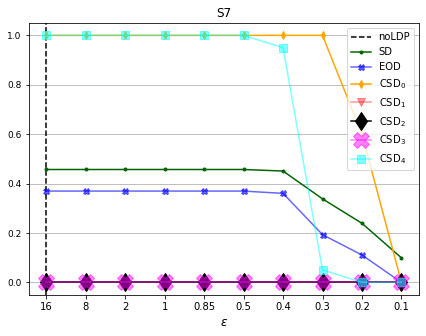

In [70]:
lst_eps = [16,8,2,1,0.85,0.5,0.4,0.3,0.2,0.1]
# specifying the plot size
plt.figure(figsize = (7, 5))
plt.axvline(x=range(len(lst_eps))[0], color='black', label = 'noLDP',linestyle='dashed')
plt.plot(sldp_sd,color='darkgreen',label='SD',marker='o',markersize=3)
plt.plot(sldp_eod,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
plt.plot(sldp_csd_X0,color='orange',label='CSD$_{0}$',marker='d',markersize=5)
plt.plot(sldp_csd_X1,color='red', label='CSD$_{1}$',marker='v',markersize=8, alpha=0.4)
plt.plot(sldp_csd_X2,color='black',label='CSD$_{2}$',marker='d',markersize=13)
plt.plot(sldp_csd_X3,color='magenta', label='CSD$_{3}$',marker='X',markersize=16, alpha=0.5)
plt.plot(sldp_csd_X4,color='cyan', label='CSD$_{4}$',marker='s',markersize=8,alpha=0.5)

#plt.xticks(range(len(lst_eps)))  

#plt.xticklabels(range(len(lst_eps)))
plt.xticks(range(len(lst_eps)), lst_eps)
plt.yticks(fontsize=9)
plt.xlabel(lst_eps,fontsize=9)
plt.xlabel('$\epsilon$', fontsize=12)   
plt.grid(axis='y')
plt.title('S7',fontsize=12)
# place legend outside
plt.legend()

# saving the plot as a pdf file
#plt.savefig(path_results + dataset + '_S5.pdf',dpi=100,bbox_inches='tight')
# rendering plot
#plt.show()

plt.savefig(path_results + dataset + "_S7.pdf", format="pdf", bbox_inches="tight")
plt.show()
